In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

![](https://2rdnmg1qbg403gumla1v9i2h-wpengine.netdna-ssl.com/wp-content/uploads/sites/3/2017/01/HeartAnatomy-745x490.jpg)

# Data Preprocessing

**Taking the dataset as a DataFrame**

In [3]:
# df = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df = pd.read_csv('framingham.csv')

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Taking Care of Missing Values**

In [5]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df['education'].fillna(value = df['education'].std(), inplace = True)
df['cigsPerDay'].fillna(value = df['cigsPerDay'].std(), inplace = True)
df['BPMeds'].fillna(value = df['BPMeds'].std(), inplace = True)
df['totChol'].fillna(value = df['totChol'].std(), inplace = True)
df['BMI'].fillna(value = df['BMI'].median(), inplace = True)
df['heartRate'].fillna(value = df['heartRate'].std(), inplace = True)
df['glucose'].fillna(value = df['glucose'].std(), inplace = True)

In [7]:
df.isna().sum() #All missing values have been taken care of

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.955186,0.494101,9.023049,0.031380,0.005899,0.310524,0.025720,234.454818,132.352407,82.893464,25.800205,75.863857,76.656083,0.151958
std,0.495022,8.572160,1.018054,0.500024,11.881664,0.169236,0.076587,0.462763,0.158316,48.941952,22.038097,11.910850,4.071041,12.065112,28.309504,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.590334,83.500000,48.000000,15.540000,12.026596,23.959998,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.080000,68.000000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,128.000000,82.000000,25.400000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Let's get some Plotting Insights!

C:\Users\mishr\AppData\Local\Temp\ipykernel_2756\1078525714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['currentSmoker'], kde = False)


<Axes: xlabel='currentSmoker'>

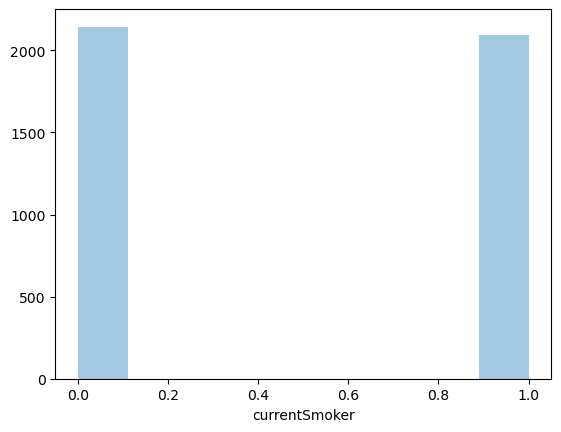

In [10]:
sns.distplot(df['currentSmoker'], kde = False)

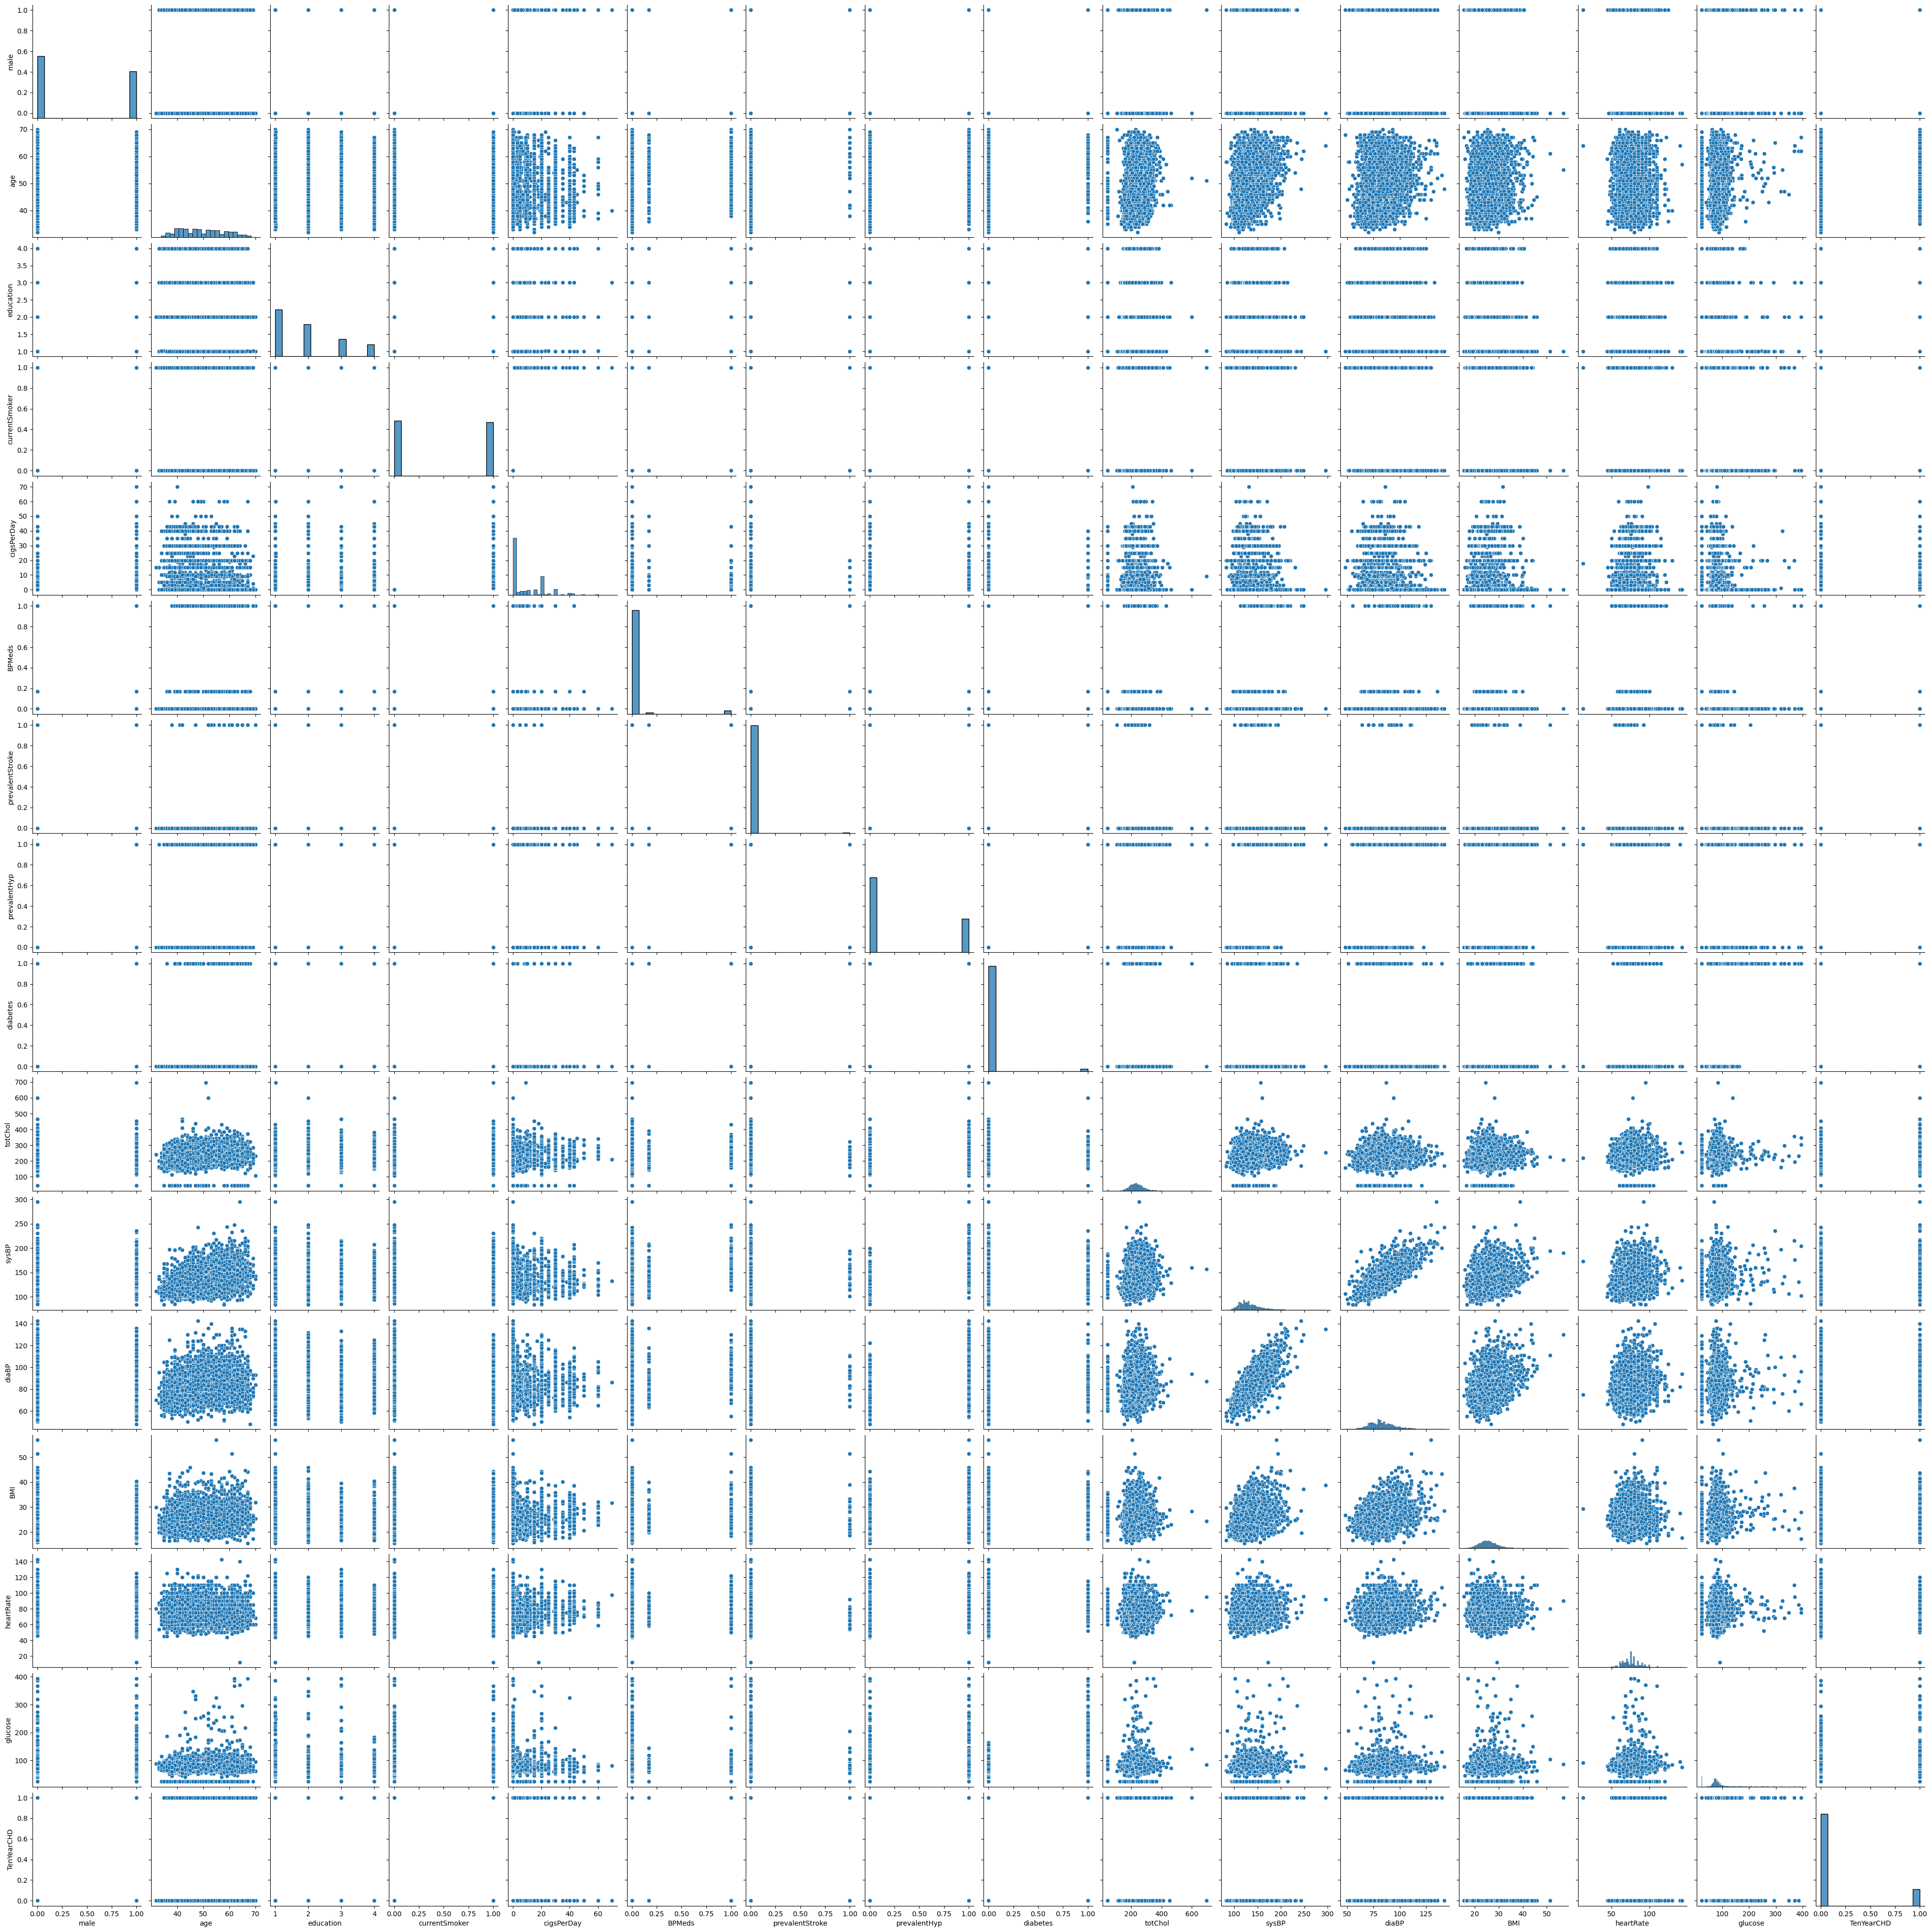

In [11]:
sns.pairplot(df)

<Axes: xlabel='currentSmoker', ylabel='totChol'>

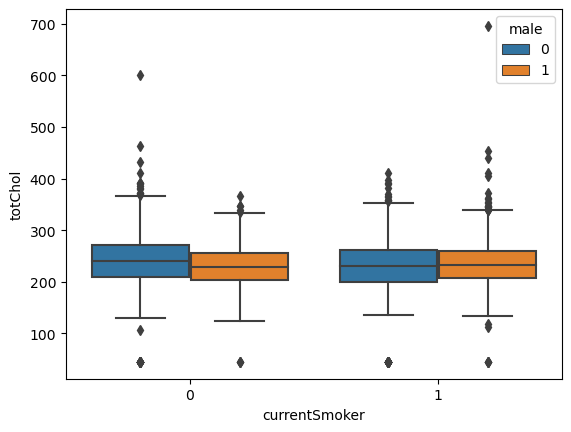

In [12]:
sns.boxplot(x = 'currentSmoker', y = 'totChol', data = df, hue = 'male')

**Let's find the correlation between ages and smokers!**

In [13]:
subdf1 = df[['age', 'currentSmoker']]

In [14]:
subdf1.head()

,age,currentSmoker
0,39,0
1,46,0
2,48,1
3,61,1
4,46,1


In [15]:
subdf1_corr = subdf1.corr() #finding correlation

<Axes: >

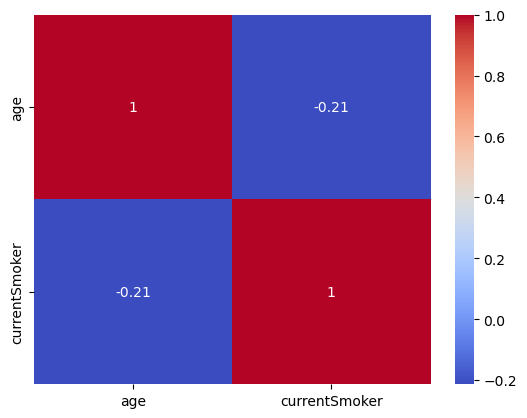

In [16]:
sns.heatmap(data = subdf1_corr, annot = True, cmap = 'coolwarm')

**From the above heatmap, we can see that there is a negative correlation between the current smokers and their ages, this simply means that the people that have younger ages represent the maximum amount of smokers :(**

# Let's train our model!

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

**Splitting into train set and test set**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

**Training the Decision Trees Model**

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

**Predicting the results on the test set**

In [20]:
y_pred = model.predict(X_test)

In [21]:
# # Extract single tree
# estimator = model.estimators_[5]
# fn=df.columns[1:]
# cn=['Smoker','Non Smoker']

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# tree.plot_tree(rf.estimators_[0],
#                feature_names = fn, 
#                class_names=cn,
#                filled = True);
# fig.savefig('rf_individualtree.png')


# # from sklearn.tree import export_graphviz
# # # Export as dot file
# # export_graphviz(model.estimators_[0], 
# #                 out_file='tree.dot', 
# #                 feature_names = fn,
# #                 class_names = cn,
# #                 rounded = True, proportion = False, 
# #                 precision = 2, filled = True)

# # # Convert to png
# # from subprocess import call
# # call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


# # # Display in jupyter notebook
# # from IPython.display import Image
# # Image(filename = 'tree.png')

**Plotting the Confusion Matrix**

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
cm_plot_labels = ['No Heart Disease','Heart Disease']

In [24]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

Confusion matrix, without normalization
[[1055   20]
 [ 177   20]]


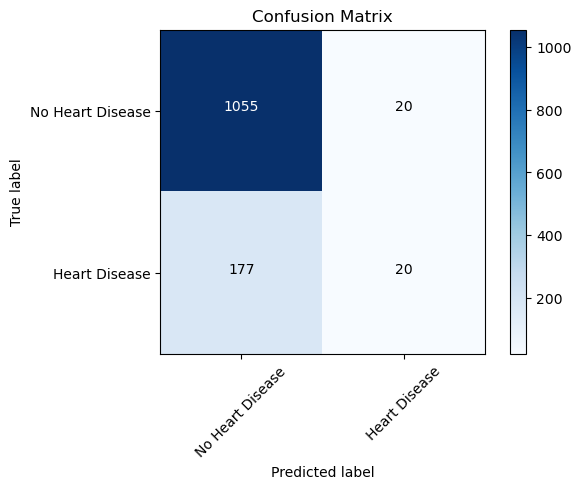

In [25]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Accuracy of the Model on the Test Set

In [26]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print('Accuracy is:',accuracy * 100)

Accuracy is: 84.5125786163522
